In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from skimage.transform import resize
import os
import pandas as pd
from skimage import color
from skimage import io
from sklearn.decomposition import PCA

In [2]:
data_exp_path = os.getcwd()
pca_path = os.path.abspath(os.path.join(data_exp_path, '../'))
repo_path = os.path.abspath(os.path.join(pca_path, '../'))
data_path = os.path.abspath(os.path.join(repo_path, '../data'))
augmented_dataset = os.path.abspath(os.path.join(data_path, 'AugmentedAlzheimerDataset'))
original_dataset = os.path.abspath(os.path.join(data_path, 'OriginalDataset'))

# Example of how this works on subset of data

In [ ]:
img = imread(original_dataset + '\\MildDemented\\' + os.listdir(original_dataset + '\\MildDemented')[0])
img = img.astype(np.uint8)
plt.imshow(img, cmap='gray')

In [ ]:
mild_demented_list = []
mild_demented_path = original_dataset + '\\MildDemented\\'

counter = 0
for image in os.listdir(mild_demented_path):
    image_path = mild_demented_path + image
    
    cur_image = plt.imread(image_path).flatten()
    
    mild_demented_list.append(cur_image)
    if counter % 250 == 0:
        print("Completed", counter)
    counter += 1
    
mild_demented_arr = np.array(mild_demented_list)

In [ ]:
mild_demented_arr.shape

In [ ]:
#mild_demented_arr[0].reshape(176, 208)
plt.imshow(mild_demented_arr[0].reshape(208, 176))

In [5]:
from sklearn.decomposition import PCA

In [ ]:
pca_80 = PCA(n_components = 0.9)

In [ ]:
pca_80.fit(mild_demented_arr)

In [ ]:
pca_80.components_[0].reshape(208, 176)

In [ ]:
plt.imshow(pca_80.components_[0].reshape(208, 176))

In [ ]:
eigenvalues = pca_80.explained_variance_

In [ ]:
len(eigenvalues)

In [ ]:
pca_80 = PCA(n_components=0.8)

In [ ]:
pca_80.fit(mild_demented_arr)

In [29]:
test_path = 'C:\\Users\\12057\\OneDrive\\Desktop\\Vanderbilt Schoolwork\\Spring 2023\\Foundations of Machine Learning\\Project\\Code\data\\OriginalDataset\\MildDemented\\26 (19).jpg'
test_image = io.imread(test_path, as_gray=True)

In [30]:
test_image.shape

(208, 176)

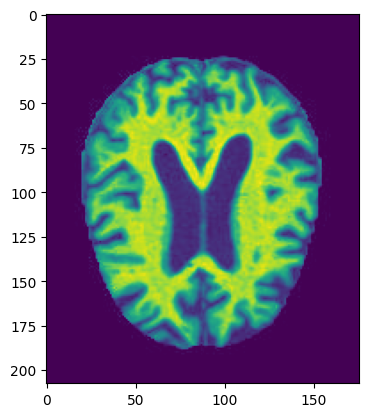

In [32]:
plt.imshow(test_image)

In [28]:
test_image[115][50]

210

# Combining what we now know... let's run it on the whole dataset!

In [3]:
dataset = []

classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

counter = 0
for subsection in classes:
    cur_path = original_dataset + '\\' + subsection + '\\'
    for image in os.listdir(cur_path):
        image_path = cur_path + image
        cur_image = plt.imread(image_path).flatten()
        dataset.append(cur_image)
        if counter % 1000 == 0:
            print("Completed", counter)
        counter += 1
            
dataset = np.array(dataset)

Completed 0
Completed 1000
Completed 2000
Completed 3000
Completed 4000
Completed 5000
Completed 6000


In [35]:
dataset.shape

(6400, 36608)

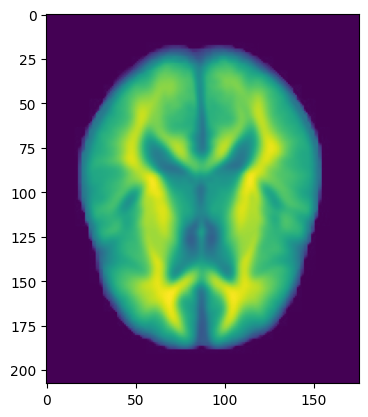

In [37]:
plt.imshow(pca_90.mean_.reshape(208, 176))

In [ ]:
# We need to scale our datasaet


In [6]:
print("Our dataset has dimension", dataset.shape)
pca_90 = PCA(n_components = 0.9)
pca_90.fit(dataset)
eigenvalues = pca_90.explained_variance_
len(eigenvalues)

Our dataset has dimension (6400, 36608)


407

In [7]:
for i, eigen in enumerate(eigenvalues):
    if i % 5 == 0:
        print(eigen)

11208472.528197968
702609.1248390952
317484.85623353155
228881.56291449486
183998.79415948197
154955.51276303676
139842.54491467954
132759.0623960406
121311.61018684237
111996.82218388222
104283.0593859963
98611.77040992313
93896.51075107955
87145.77081131609
84103.52455261307
80933.6683417378
76428.66635884132
72771.57394054571
69429.61789360356
66582.96849093403
63514.054021510936
61604.01089681763
59378.57946612064
57042.72637614865
55119.459455757366
53266.98882200352
51116.12545647046
49478.313811323904
48157.72505930888
46470.46504301045
44876.514370053745
43448.91131814415
42220.45441059247
40771.90810655452
39649.719958249756
38624.76784161065
37633.57499182856
36588.67560005868
35649.38983134202
34541.1791258886
33446.16789647015
32813.148821030605
31944.7294018716
31136.768562190322
30609.610125411204
29641.895493353906
28915.251945130804
28078.26146588343
27464.68772900005
26957.44421547483
26331.74674221748
25649.879233490374
25109.641070339658
24537.05435696249
23878.12215

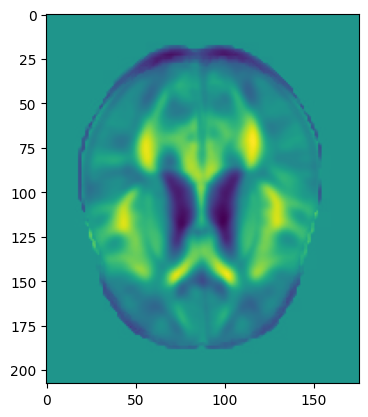

In [8]:
plt.imshow(pca_90.components_[0].reshape(208, 176))

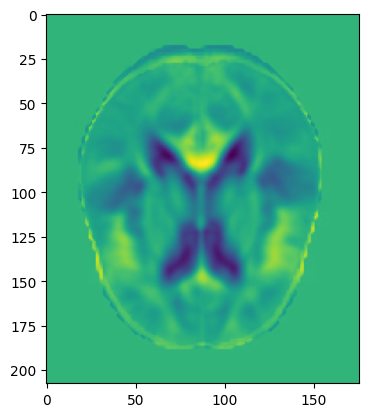

In [9]:
plt.imshow(pca_90.components_[1].reshape(208, 176))

In [34]:
%%time
import time
time.sleep(3)

CPU times: total: 0 ns
Wall time: 3.01 s


In [ ]:
# Here are the first 100 eigenvectors
